# S01.E02 - **A 365 Day Emotional Journey in Color**
by **@caesarmario** /// <a href="https://linktr.ee/caesarmario_">https://linktr.ee/caesarmario_</a>

## 1. | Importing Libraries

In [1]:
# --- Libraries for 'Secret Sauce' ---
import sys
from IPython.display import display, HTML, Javascript

# --- 'Secret Sauce' Variables ---
""" Change Variables ~! HERE !~ """
project_date = "20231108"
local_path = "config_data_slices"

# ---'Secret Sauce' Function ---
def apply_config_file_data_slices(local_path, project_date):
    sys.path.append(f"{local_path}/{project_date}/")
    
# --- Apply Function & Import Config File ---
apply_config_file_data_slices(local_path, project_date)
from config_file import *

In [2]:
# --- Installing and Importing Libraries ---
# !pip install emoji

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import urllib
import emoji
import math

from matplotlib.patches import Polygon
from matplotlib.colors import Normalize, ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.collections import LineCollection
from PIL import Image
from highlight_text import fig_text, ax_text

## 2. | Importing Dataset

In [3]:
# --- Importing Dataset ---
df = pd.read_csv("mood_tracker_2023.csv")
df.sample(5)

,Dates,Day,Mood
212,2023-08-01,Tuesday,Good
292,2023-10-20,Friday,Great
278,2023-10-06,Friday,Above Average
345,2023-12-12,Tuesday,Below Average
225,2023-08-14,Monday,Above Average


In [4]:
# --- Processing Data ---
mood_dict = {
    "EMPTY": 0
    , "Awful": 1
    , "Bad": 2
    , "Below Average": 3
    , "Average": 4
    , "Above Average": 5
    , "Good": 6
    , "Great": 7
}

df["Mood"]=df["Mood"].replace(mood_dict)
df["Dates"] = pd.to_datetime(df.Dates, yearfirst=True)
df.set_index("Dates", inplace=True)
df.sample(5)

,Day,Mood
Dates,,
2023-12-02,Saturday,6
2023-04-03,Monday,5
2023-08-14,Monday,5
2023-02-12,Sunday,6
2023-12-25,Monday,7


## 3. | "Emotional Journey" Figure

In [5]:
# --- "Emotional Journey" Figure Variables ---
# Sizes
logo_size = 0.08
wm_size = 0.1

# Dates
WEEKS_IN_MONTH = 6
DAYS_IN_WEEK = 7
DAY_LABELS = ['S', 'M', 'T', 'W', 'T', 'F', 'S']
MONTH_LABELS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Figure & Highlight Props
fig_text_prop = dict(ha="center", va="center")
subtitle_highlight_prop = [
    {"color": color_highlight, "weight": 600, "font": font_alt}
]
sources_highlight_prop = [
    {"font": font_main, "weight": 700, "style": "normal", "fontsize": 5}
]

In [6]:
# --- Splitting Months from Dates Function ---
def split_months(df, year):
    
    # Empty Matrices
    a = np.empty((6, 7))
    a[:] = np.nan

    day_nums = {m:np.copy(a) for m in range(1,13)}
    day_vals = {m:np.copy(a) for m in range(1,13)}

    # Shape Datatimes to Matrices in Calendar Layout
    date = pd.Timestamp(year=year, month=1, day=1)
    oneday = pd.Timedelta(1, unit='D')
    
    while date.year == year:
        try:
            value=df[date]
        except KeyError:
            value=0
        
        day, month = date.day, date.month
        col = (date.dayofweek + 1) % 7

        if date.is_month_start:
            row = 0

        day_nums[month][row, col] = day  # Day number (0-30/31)
        day_vals[month][row, col] = value # Day value (the heatmap data)

        if col == 6:
            row += 1
        
        date = date + oneday

    return day_nums, day_vals

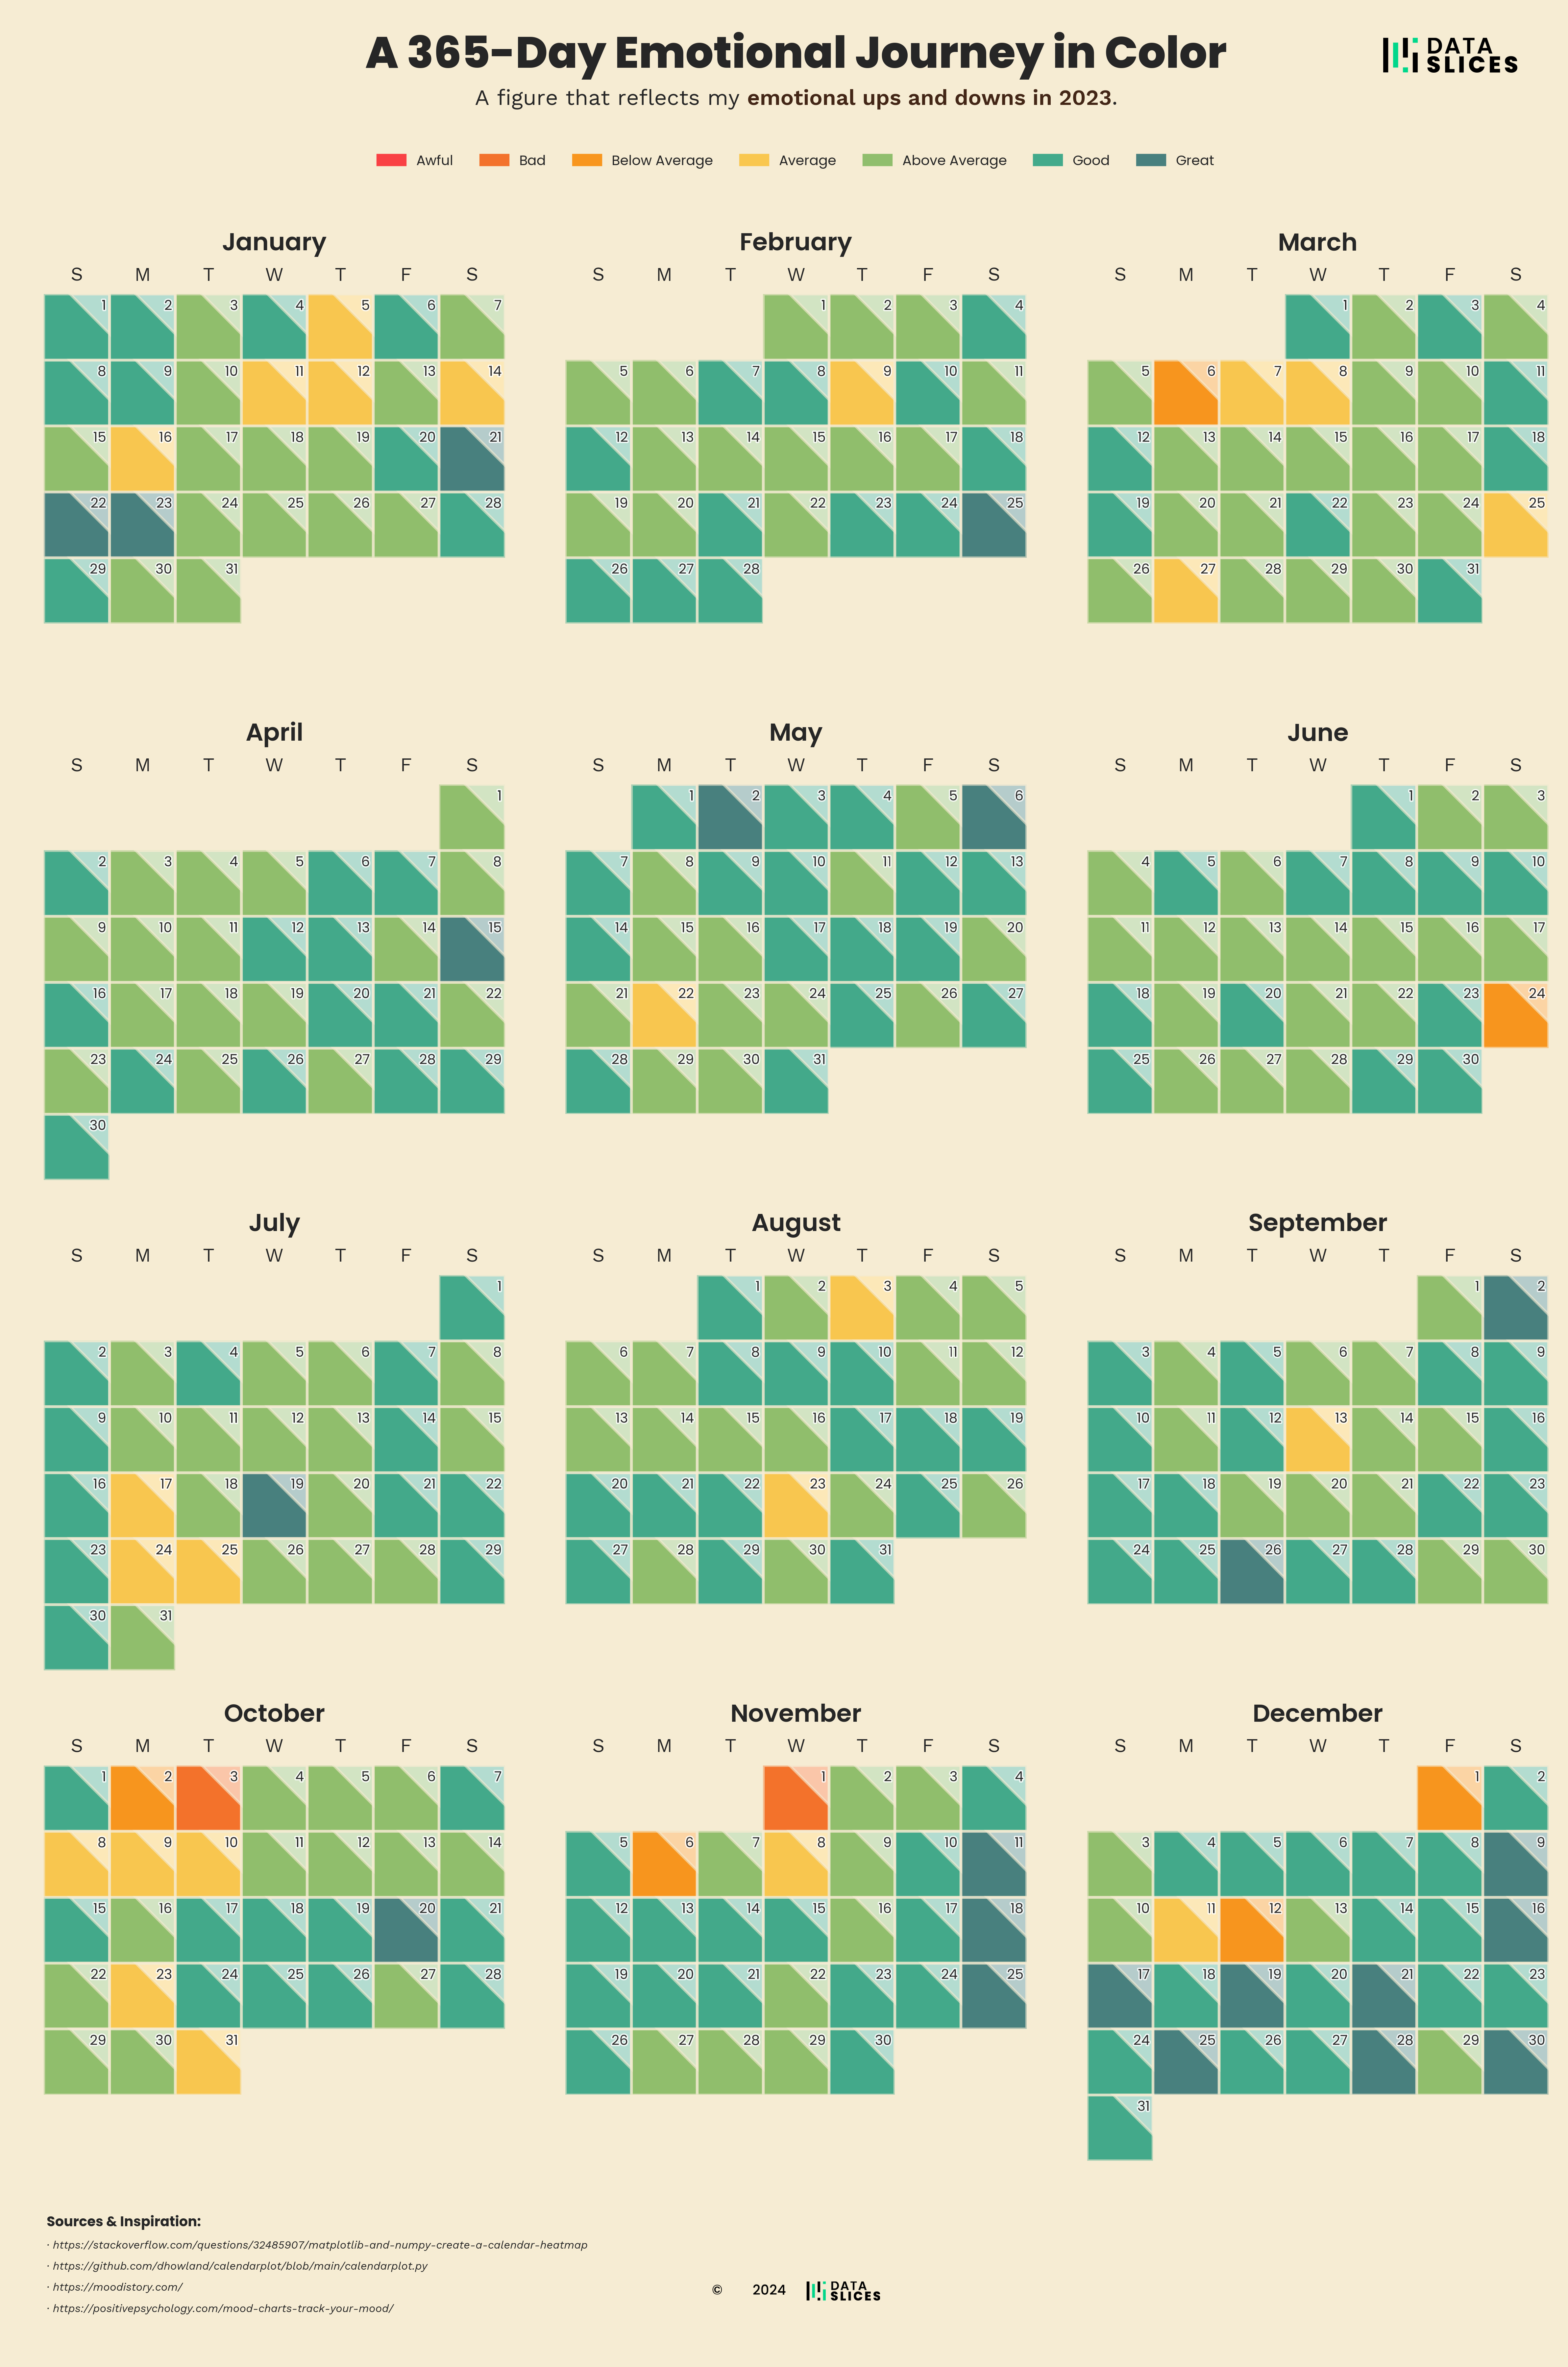

In [7]:
# --- Generating "Emotional Journey" Figure ---
def emotional_journey(df, year):
    
    # --- Variables ---
    vmin = df.min()
    vmin = vmin if vmin < 0 else 0
    vmax = df.max() 
    day_nums, day_vals = split_months(df, year)
    
    # --- Calendar Figure ---
    fig, ax = plt.subplots(4, 3, figsize=(8.5, 11))
    for i, axes in enumerate(ax.flat):
        
        # Creating Heatmap Figure
        axes.imshow(day_vals[i+1], cmap=color_map, vmin=vmin, vmax=vmax)
        
        # Month Title
        axes.set_title(MONTH_LABELS[i], fontsize=9, fontweight=600)

        # Labels
        axes.set_xticks(np.arange(DAYS_IN_WEEK))
        axes.set_xticklabels(DAY_LABELS, font=font_alt, fontsize=7)
        axes.set_yticklabels([])

        # Tick Marks
        axes.tick_params(axis="both", which="both", length=0) 
        axes.xaxis.tick_top()

        # Modify Tick Locations
        axes.set_xticks(np.arange(-0.5, 6, 1), minor=True)
        axes.set_yticks(np.arange(-0.5, 5, 1), minor=True)
        axes.grid(False)

        # Despine
        for spine in axes.spines.values(): spine.set_color("None")

        # Annotate
        for w in range(WEEKS_IN_MONTH):
            for d in range(DAYS_IN_WEEK):
                day_num = day_nums[i+1][w, d]

                # Add Annotation if Day Number is Valid Calendar Day
                if not np.isnan(day_num):
                    day_num_text = axes.text(d+0.45, w-0.31, f"{int(day_num)}", ha="right", va="center", fontsize=5, alpha=0.8, color=color_line)
                    day_num_text.set_path_effects([path_effects.Stroke(linewidth=1, foreground="white"), path_effects.Normal()])

                    # Aesthetic Calendar Day Number & Square
                    patch_coords_tri = ((d-0.1, w-0.5)
                                        , (d+0.5, w-0.5)
                                        , (d+0.5, w+0.1))
                    triangle = Polygon(patch_coords_tri, fc="w", ec=face_color, alpha=0.6)
                    axes.add_artist(triangle)
                    
                    patch_coords_sqr = ((d-0.5, w-0.5)
                                        , (d-0.5, w+0.5)
                                        , (d+0.5, w+0.5)
                                        , (d+0.5, w-0.5))
                    square = Polygon(patch_coords_sqr, fc="none", ec=face_color, alpha=0.6)
                    axes.add_artist(square)
    
    # --- Adding Legend ---
    fig.legend(handles=legend_list, fontsize=5, ncol=len(legend_list), bbox_to_anchor=(0.5, 0.97), loc="upper center", frameon=False)
    
    # --- Image Logo ---
    # Logo
    logo_ax = fig.add_axes([0.85, 0.97, logo_size, logo_size], fc="None")
    logo_ax.imshow(data_slices_logo)
    logo_ax.axis("off")
    
    # Watermark
    wm_ax = fig.add_axes([0.45, -0.07, wm_size, wm_size], fc="None")
    wm_ax.imshow(data_slices_wm)
    wm_ax.axis("off")
    
    # --- Figure Texts ---
    # Title
    fig_text(s=f"A 365-Day Emotional Journey in Color", x=0.5, y=1.01, fontsize=16, weight=800, **fig_text_prop)
    
    # Subtitle
    fig_text(s=f"A figure that reflects my <emotional ups and downs in {year}>.", x=0.5, y=0.99, fontsize=8, font=font_alt, highlight_textprops=subtitle_highlight_prop, **fig_text_prop)
    
    # References
    fig_text(s="""
    <Sources & Inspiration:>
    ∙ https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
    ∙ https://github.com/dhowland/calendarplot/blob/main/calendarplot.py
    ∙ https://moodistory.com/
    ∙ https://positivepsychology.com/mood-charts-track-your-mood/
    """, x=0.21, y=-0.01, fontsize=4, font=font_alt, style="italic", highlight_textprops=sources_highlight_prop, **fig_text_prop)
    
    # --- Finalizing Figure ---
    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.04, wspace=0.12, hspace=0.24);
    plt.savefig(f"data_slices_s01e02_mood_calendar.png", dpi=figure_dpi_hd, bbox_inches="tight", edgecolor="none", transparent=False);
    
# --- Generate "Emotional Journey" ---
emotional_journey(df["Mood"], 2023)

## 4. | "Summary Report" Figure

In [8]:
# --- Average Mood of the Year Function ---
def gauge_chart(df, ax=None):
    
    # Variables
    avg_mood = round(df["Mood"].mean(), 2)
    emoji_color, emojis = if_else_gauge(int(avg_mood)+1)
    
    # Figure Props
    arrowkw = dict(arrowstyle="wedge, tail_width=0.4", facecolor=emoji_color, linewidth=1.5, edgecolor="white")
    title_prop = dict(fontsize=26, font=font_main, weight=700)
    annotatekw = dict(color="white", fontweight=800, size=6.5, font=font_emoji)
    highlight_prop = [
        {"font": font_alt, "weight": 600, "size": 20, "ha": "center", "va": "center"}
    ]
    
    # Generate Figure
    ax.bar(x=x_axis_vals, width=0.5, height=0.5, bottom=2, linewidth=3.5, color=list_mood_color[::-1], edgecolor=face_color, align="edge")
    ax.annotate(" ", xytext=(0, 0), xy=(int(avg_mood)*0.22, 2.2), fontsize=60, arrowprops=arrowkw)
    ax_text(x=0, y=0, s=f"{emojis}\n<{avg_mood}/7>", ax=ax, size=44, ha="center", va="center", font=font_emoji, color=emoji_color, highlight_textprops=highlight_prop)
    ax.set_title("\nAverage Mood of the Year\n", **title_prop)
    for em_ann, xypos, rot in annotate_dictt.values():
        ax.annotate(em_ann, xy=xypos, rotation=rot, **annotatekw)
    ax.axis("off")

In [9]:
# --- Mood Distribution Over the Year Function ---
def mood_distribution(df, ax=None):

    # Dataframe
    df_dist = df["Mood"].reset_index() \
                        .drop("Dates", axis=1)
    df_dist = pd.DataFrame(df_dist.groupby(["Mood"]) \
                                   .size().reset_index(name="Total"))
    df_dist["Percentage"] = round(100 * df_dist["Total"] / 365, 2)
    df_dist = df_dist[["Mood", "Percentage"]].set_index("Mood").T
    
    # Figure Props
    txt_stacked_kw = dict(fontweight=500, fontsize=9, horizontalalignment="center", verticalalignment="center")
    arrowstackedkw = dict(arrowstyle="wedge, tail_width=1", facecolor="black", linewidth=0)
    title_prop = dict(fontsize=26, font=font_main, weight=700)
    
    # Plot
    df_dist.plot.barh(stacked=True, ax=ax, legend=False, edgecolor=face_color, linewidth=2, color=dist_colors)
    
    # Annotation
    for rect, em_dict in zip(ax.patches, annotate_dictt.values()):
        width, height, em_ann = rect.get_width(), rect.get_height(), em_dict[0]
        x, y = rect.get_xy()
        if width >= 5:
            ax.text(x+width/2, (y+height/2)+0.06, f"{width:.2f}%", font=font_alt, **txt_stacked_kw)
            ax.text(x+width/2, (y+height/2)-0.02, f"{em_ann}", font=font_emoji, **txt_stacked_kw)
        elif 1 <= width < 5:
            ax.text(x+width/2, (y+height*1.28)+0.1, f"{width:.2f}%", font=font_alt, **txt_stacked_kw)
            ax.text(x+width/2, (y+height*1.28)+0.01, f"{em_ann}", font=font_emoji, **txt_stacked_kw)
            ax.annotate(" ", xytext=(x+width/2, (y+height*1.28)+0.01), xy=(x+width/2, y*-1)
                        , arrowprops=arrowstackedkw, **txt_stacked_kw)
        elif width < 1:
            ax.text(x+width/2, (y+height*-0.44)+0.07, f"{width:.2f}%", font=font_alt, **txt_stacked_kw)
            ax.text(x+width/2, (y+height*-0.44)-0.01, f"{em_ann}", font=font_emoji, **txt_stacked_kw)
            ax.annotate(" ", xytext=(x+width/2, y+height*-0.3), xy=(x+width/2, y), arrowprops=arrowstackedkw, **txt_stacked_kw)
    
    # XY Settings
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)
    y_axis = ax.axes.get_yaxis()
    y_axis.set_visible(False)
    
    # Title
    ax.set_title("Mood Distribution Over the Year\n\n", **title_prop)
    ax.axis("off")

In [10]:
# --- Average Mood on Certain Day Function ---
def mood_for_the_day(df, ax=None):
    
    # Dataframe
    df_daily = df[["Mood", "Day"]]
    df_daily["Day"] = pd.Categorical(df_daily["Day"], categories=df_daily["Day"].unique(), ordered=True)
    df_daily = df_daily \
                .reset_index() \
                .drop("Dates", axis=1)
    df_daily = pd.DataFrame(round(df_daily.groupby(["Day"]).mean() \
                                        .reset_index(), 2))
    df_daily = df_daily.set_index("Day").T
    
    # Variables
    avg_color_list = []
    day_list = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    
    # Figure Props
    txt_stacked_kw = dict(horizontalalignment="center", verticalalignment="center")
    title_prop = dict(fontsize=26, font=font_main, weight=700)
    
    # Color List
    for day in df_daily:
        avg_val = df_daily.iloc[0][day]
        avg_color, avg_emojis = if_else_gauge(avg_val)
        avg_color_list.append(avg_color)
    
    # Plot
    df_daily.plot.barh(stacked=True, ax=ax, legend=False, edgecolor=face_color, linewidth=5, color=avg_color_list)
    ax.set_xlim([0, math.ceil(df_daily.sum(axis=1)[0])])
    
    # Annotation
    for rect, day in zip(ax.patches, day_list):
        width, height = rect.get_width(), rect.get_height()
        x, y = rect.get_xy()
        em_clr, em_ann = if_else_gauge(width)
        ax.text(x+width/2, (y+height/2)+0.07, f"{width:.2f}", fontsize=12, font=font_alt, **txt_stacked_kw)
        ax.text(x+width/2, (y+height/2)-0.06, f"{em_ann}", fontsize=18, font=font_emoji, **txt_stacked_kw)
        ax.text(x+width/2, (y+height*1.15), f"{day}", weight=500, fontsize=10, **txt_stacked_kw)
    
    # Title
    ax.set_title("Average Mood on Certain Day", **title_prop)
    ax.axis("off")

In [11]:
# --- Average Mood in Each Month Function ---
def mood_monthly(df, ax=None):
    
    # Dataframe
    df_monthly = df.reset_index()
    df_monthly = pd.DataFrame(df_monthly.groupby(df_monthly.Dates.dt.month)["Mood"].mean()) \
                    .reset_index() \
                    .rename(columns={"Dates": "Month", "Mood": "Avg Mood"})
    
    # Figure Props
    xy_ticks = dict(fontsize=8)
    bar_prop = dict(align="center", zorder=3, edgecolor=face_color, linewidth=1)
    x_grid_prop = dict(alpha=0, zorder=2)
    y_grid_prop = dict(which="major", alpha=0.3, color="black", linestyle="dotted", zorder=1)
    patches_prop = dict(fontsize=7, font=font_alt, horizontalalignment="center", verticalalignment="center")
    title_prop = dict(fontsize=26, font=font_main, weight=700)
    
    # Variables
    month_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    month_ticks, mood_ticks = list(np.arange(1, 13, 1)), list(np.arange(1, 8, 1))
    monthly_clr_list = []
    
    # Bar Color List
    for avgmood in df_monthly["Avg Mood"]:
        monthly_clr, monthly_emj = if_else_gauge(avgmood)
        monthly_clr_list.append(monthly_clr)
        
    # Plot
    ax.bar(df_monthly["Month"], df_monthly["Avg Mood"], color=monthly_clr_list, **bar_prop)
    
    # Figure Settings
    ax.set_xticks(ticks=month_ticks, labels=month_list, **xy_ticks)
    ax.set_yticks(ticks=mood_ticks, labels=[], **xy_ticks)
    ax.grid(axis="x", **x_grid_prop)
    ax.grid(axis="y", **y_grid_prop)
    for spine in ax.spines.values(): spine.set_color("None")
    
    # Annotation
    for rect in ax.patches:
        width, height = rect.get_width(), rect.get_height()
        x, y = rect.get_xy()
        ax.text(x+width/2, y+height+0.23, "{:.2f}".format(height), **patches_prop)
    
    # Title
    ax.set_title("Average Mood in Each Month\n", **title_prop)

In [12]:
# --- Weekly Mood Progress Function ---
def weekly_progress(df, ax=None):
    
    # Dataframe
    df_weekly = df.reset_index()
    df_weekly["Week Number"] = df_weekly["Dates"].dt.strftime("%U").astype("int64")
    df_weekly = pd.DataFrame(df_weekly.groupby(df_weekly["Week Number"])["Mood"].mean()).reset_index()
    df_weekly["Color"] = pd.cut(df_weekly["Mood"], list(np.arange(0, 9, 1)), labels=color_grad)
    df_weekly["Color"] = pd.Categorical(df_weekly["Color"])
    df_weekly["Prev Mood"] = df_weekly["Mood"].shift()
    
    # Variables
    mood_ticks = list(np.arange(1, 8, 1))
    points = np.c_[df_weekly["Week Number"], df_weekly["Mood"]]
    segments = np.c_[points[:-1], points[1:]].reshape(-1, 2, 2)
    
    # Figure Props
    xy_label = dict(fontsize=16, weight="bold")
    xy_ticks = dict(fontsize=8)
    x_grid_prop = dict(alpha=0, zorder=2)
    y_grid_prop = dict(which="major", alpha=0.3, color="black", linestyle="dotted", zorder=1)
    title_prop = dict(fontsize=26, font=font_main, weight=700)
    patches_prop = dict(fontsize=7, font=font_alt, horizontalalignment="center")
    
    # Line Plot
    l0 = LineCollection(segments
                        , colors=df_weekly["Color"].str.lower()
                        , array=df_weekly["Color"].cat.codes
                        , linewidth=1)
    ax.add_collection(l0)
    ax.autoscale_view()
    
    # Scatter Plot
    l1 = ax.scatter(df_weekly["Week Number"], df_weekly["Mood"]
                                    , color="white"
                                    , marker="o"
                                    , s=25
                                    , edgecolor=df_weekly["Color"]
                                    , zorder=3)
    
    # Annotation
    for index, row in df_weekly.iterrows():
        if row["Week Number"] % 4 == 0:
            if row["Mood"] > row["Prev Mood"] or row["Mood"] > 5.50:
                ax.text(row["Week Number"], row["Mood"]+0.46, "{:.2f}".format(row["Mood"]), **patches_prop)
            elif row["Mood"] < row["Prev Mood"]:
                ax.text(row["Week Number"], row["Mood"]-0.63, "{:.2f}".format(row["Mood"]), **patches_prop)
    
    # Figure Settings
    ax.grid(axis="y", **y_grid_prop)
    ax.grid(axis="x", **x_grid_prop)
    
    ax.set_ylabel("", **xy_label)
    ax.set_xlabel("", **xy_label)
    
    ax.set_ylim([0, 7])
    ax.set_xlim([df_weekly["Week Number"].min()-1, df_weekly["Week Number"].max()+1])
    
    ax.set_yticks(ticks=mood_ticks, labels=mood_labels, font=font_emoji, ha="center", x=-0.02, y=-0.1, **xy_ticks)
    ax.set_xticks(ticks=list(np.arange(1, 53, 4)), labels=list(np.arange(1, 53, 4)), ha="center", **xy_ticks)
    
    for ytick in ax.get_yticklabels():
        ytick_txt = ytick.get_text()
        
        if emoji.emojize(":disappointed_relieved:", language="alias") in ytick_txt:
            ytick.set_color(color_grad[1])
        elif emoji.emojize(":disappointed:", language="alias") in ytick_txt:
            ytick.set_color(color_grad[2])
        elif emoji.emojize(":worried:", language="alias") in ytick_txt:
            ytick.set_color(color_grad[3])
        elif emoji.emojize(":neutral_face:", language="alias") in ytick_txt:
            ytick.set_color(color_grad[4])
        elif emoji.emojize(":slightly_smiling_face:", language="alias") in ytick_txt:
            ytick.set_color(color_grad[5])
        elif emoji.emojize(":smile:", language="alias") in ytick_txt:
            ytick.set_color(color_grad[6])
        elif emoji.emojize(":satisfied:", language="alias") in ytick_txt:
            ytick.set_color(color_grad[7])
    
    for spine in ax.spines.values(): spine.set_color("None")
    
    # Title
    ax.set_title("Weekly Mood Progress\n", **title_prop)

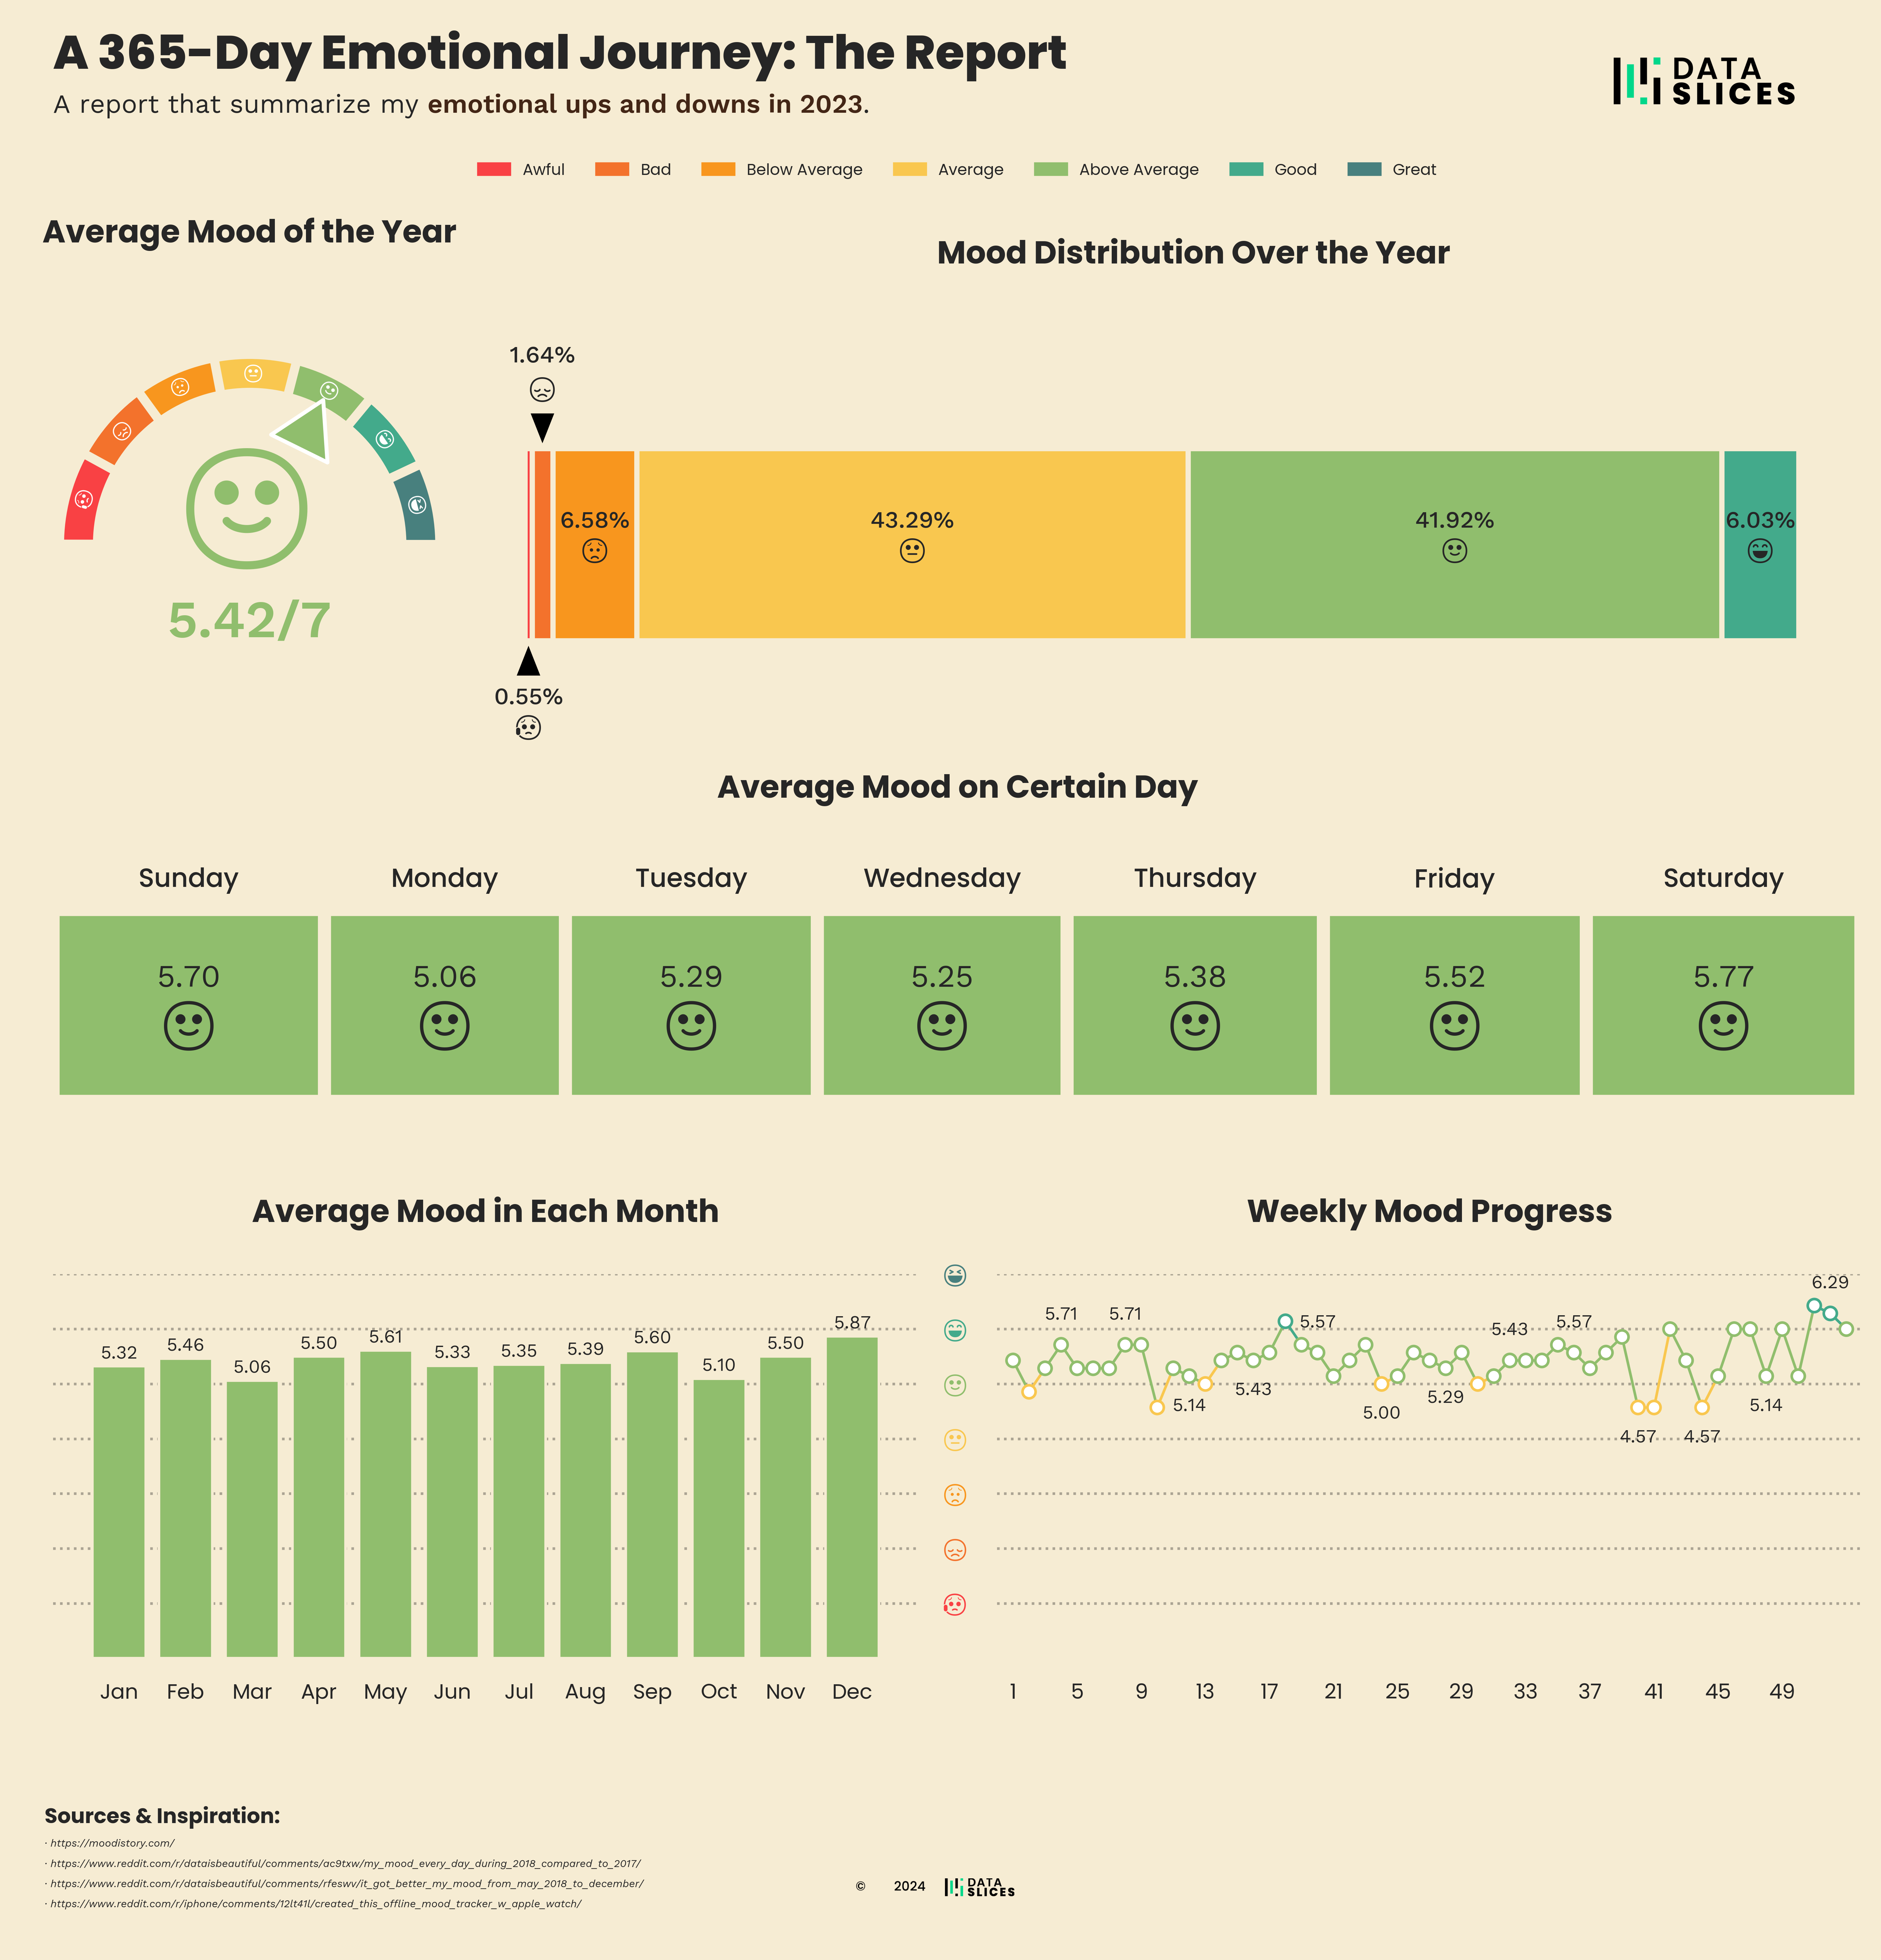

In [13]:
# --- Generating "Summary Report" Figure ---
def mood_summary_report(df):
    
    # --- Sizes ---
    logo_size = 0.08
    wm_size = 0.07
    
    # --- Variables ---
    fig_text_prop = dict(ha="left", va="bottom")
    subtitle_highlight_prop = [
        {"color": color_highlight, "weight": 600, "font": font_alt}
    ]
    sources_highlight_prop = [
        {"font": font_main, "weight": "bold", "style": "normal", "fontsize": 8}
    ]

    # --- Figure Size ---
    fig = plt.figure(figsize=(12, 9))
    fig.subplots_adjust(left=0.1, right=0.9)
    gs = gridspec.GridSpec(3, 4)
    
    # --- Average Mood of the Year ---
    ax_meter = fig.add_subplot(gs[0, :1], projection="polar")
    gauge_chart(df, ax=ax_meter)
    
    
    # --- Mood Distribution Over the Year ---
    ax_dist = fig.add_subplot(gs[0, 1:])
    mood_distribution(df, ax=ax_dist)
    
    
    # --- Average Mood on Certain Day ---
    ax_avg_mood = fig.add_subplot(gs[1, :4])
    mood_for_the_day(df, ax=ax_avg_mood)

    
    # --- Average Mood in Each Month ---
    ax_mood_monthly = fig.add_subplot(gs[2, :2])
    mood_monthly(df, ax=ax_mood_monthly)
    
    
    # --- Weekly Mood Progress ---
    ax_weekly_progress = fig.add_subplot(gs[2, 2:])
    weekly_progress(df, ax=ax_weekly_progress)
    
    
    # --- Legend ---
    fig.legend(handles=legend_list, fontsize=6, ncol=len(legend_list), bbox_to_anchor=(0.5, 1), loc="upper center", frameon=False)
    
    # --- Image Logo ---
    # Logo
    logo_ax = fig.add_axes([0.79, 1, logo_size, logo_size], fc="None")
    logo_ax.imshow(data_slices_logo)
    logo_ax.axis("off")

    # Watermark
    wm_ax = fig.add_axes([0.455, -0.06, wm_size, wm_size], fc="None")
    wm_ax.imshow(data_slices_wm)
    wm_ax.axis("off")
    
    
    # --- Figure Texts ---
    # Title
    fig_text(s="A 365-Day Emotional Journey: The Report", x=0.1, y=1.04, fontsize=18, weight=800, **fig_text_prop)

    # Subtitle
    fig_text(s=f"A report that summarize my <emotional ups and downs in 2023>."
             , x=0.1, y=1.018, fontsize=10, font=font_alt, highlight_textprops=subtitle_highlight_prop, **fig_text_prop)

    # References
    fig_text(s="""
    <Sources & Inspiration:>
    ∙ https://moodistory.com/
    ∙ https://www.reddit.com/r/dataisbeautiful/comments/ac9txw/my_mood_every_day_during_2018_compared_to_2017/
    ∙ https://www.reddit.com/r/dataisbeautiful/comments/rfeswv/it_got_better_my_mood_from_may_2018_to_december/
    ∙ https://www.reddit.com/r/iphone/comments/12lt41l/created_this_offline_mood_tracker_w_apple_watch/
    """, x=0.09, y=-0.05, fontsize=4, font=font_alt, style="italic", highlight_textprops=sources_highlight_prop, **fig_text_prop)

    # Finalizing Figure
    plt.tight_layout(rect=[None, None, 0, 0])
    plt.savefig(f"data_slices_s01e02_mood_report.png", dpi=figure_dpi_hd, bbox_inches="tight", edgecolor="none", transparent=False);
    plt.show();

# --- Generate "Summary Report" ---
mood_summary_report(df)

<hr>
<center>
    <span style="font-family: Segoe UI; font-style: italic; font-weight: 700; font-size: 12px; padding: 7px; text-align: center; line-height: 1.2;"><u>Support me on:</u></span><br>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    <span style="margin: 0; text-align: center; justify-content: center; align-items: center;">
        <a href='https://ko-fi.com/D1D3JU963' target='_blank'><img src='https://ko-fi.com/img/githubbutton_sm.svg' alt='Support me on Ko-fi Button'/></a></span><br>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    <span style="font-family: Segoe UI; font-style: italic; font-weight: 700; font-size: 12px; padding: 7px; text-align: center; line-height: 1.2;"><u>Follow me in other platform:</u></span><br>
    <div align="center" style="margin: 0; padding: 10px; text-align: center; justify-content: center; align-items: center;">
        <ul style="list-style: none;">
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://www.kaggle.com/caesarmario"><img style="width: 25px;" src="https://i.imgur.com/K6QyzaJ.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://public.tableau.com/app/profile/caesarmario"><img style="width: 25px;" src="https://i.imgur.com/JVxVkeQ.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://github.com/caesarmario"><img style="width: 25px;" src="https://i.imgur.com/Orp40Ys.png"></a></li>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://caesarmario.medium.com/"><img style="width: 25px;" src="https://i.imgur.com/6TrHyu0.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://www.linkedin.com/in/caesarmario"><img style="width: 25px;" src="https://i.imgur.com/vVYd0aI.png"></a></li>
            <li style="margin: 0 20px 20px 0; vertical-align: top; list-style: none outside none; display: inline-block;"><a style="position: relative;" href="https://twitter.com/caesarmario_"><img style="width: 25px;" src="https://i.imgur.com/kEE4YJx.png"></a></li>
        </ul>
    </div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    <img src="https://i.imgur.com/iuaulzI.png" width=65% alt="WM">
</center>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my work, please support me by giving stars (⭐) to this repo. You can also support me by donating to my Ko-Fi page ☕: https://ko-fi.com/caesarmario. Your donation and support will be highly appreciated since they motivate me to create new content. Thank you so much, and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->